# Disjoint Events Constant Risk Model

In this notebook we will develop "survival models". These will be mathematical devices to (in the next notebook) evaluate our current existential risk situation. 

What I want to achieve with these existential risk/survival models, is to estimate a civilization's life-span, as a function of current risk levels, and based on it's handling of these risks.

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as srs

from the_extinction_game.models.disjoint_events_constant_risk import DisjointEventsConstantRiskModel
from the_extinction_game.experiment import Experiment

# Setup seaborn
srs.set_theme()

## The Extinction Game

The basis for developing the survival models in this notebook is what I call *The Extinction Game*.

We start with basic models, and then proceed to make them progressively more complex, allowing us to model more complex dynamics, like the change of X-Risk through the centuries, and making successive Extinction Games dependent.

So what is the Extinction Game?

It's a game that the virtual civilizations' - whose fate we're trying to capture in a mathematical model - play once every century. The game has two possible outcomes:

- The civilization survives and goes on to play again in the next century, or
- it looses, and doesn't get to play again

We're not going to go into the details of what it means to *win* or *loose* the game, that'll be a subject for later, which involves a more philosophical discussion. In this notebook, we'll focus on the more technical and mathematical aspects.

We'll devise the following survival models:

- [x] Disjoint events with constant risk
- [x] Single risk binary tree with constant risk change
- [x] Multi risk binary tree with constant risk change
- [ ] Multi risk binary tree with risk change correlations
- [ ] Multi risk binary tree with asymmetric risk change

Let's get to it!


# Disjoint Events with Constant Total Risk

This is the simplest model. In it, humanity's existential risk is modeled as a probability cascade, where the extinction game is played every century, and every century is independent - meaning that the outcome in one century doesn't affect the game in other centuries. We also use a constant figure for total risk. 

Though this model has the downside of modeling each century as independent - which they're arguably not - it could serve as a "business as usual" scenario, where risk levels are maintained, reflecting a lack of effort to actively reduce them, or just enough effort to not let them increase.

To describe the problem we introduce the following events and expressions:

- $E$: Extinction in a randomly chosen century
- $E_n$: Extinction after $n$ centuries
- $S$: Survival in a randomly chosen century
- $S_n$: Survival after $n$ centuries
- $P(E)$: Probability of extinction in a randomly chosen century
- $P(S)$: Probability of survival in a randomly chosen century
- $P(E_n)$: Probability of extinction after $n$ centuries
- $P(S_n)$: Probability of survival after $n$ centuries

We can establish the relationships between $P(E)$, $P(S)$, $P(E_n)$, and $P(S_n)$.

First we assume that $P(S)$ and $P(E)$ are complementary and mutually exclusive. Either there is or isn't an extinction event in a randomly chosen century. And similarly, after $n$ centuries, either there has been or there hasn't been an extinction event, so $P(E_n)$, and $P(S_n)$ are also mutually exclusive and complementary.

$$
\begin{aligned}
P(S) &= 1 - P(E) \\
P(S_n) &= 1 - P(E_n)
\end{aligned}
$$

To model the survival probability after $n$ centuries, we can just multiply the survival probability $n$ times, or raise it to the power of $n$:

$$
\begin{aligned}
P(S_n) &= P(S)^n \\
P(S_n) &= \left[1 - P(E) \right]^n
\end{aligned}
$$

The expression $P(S_n)$ tells us then that the probability of survival after $n$ centuries is the complementary existential risk ($1-P(E)$) raised to the power of $n$.

We've now modeled the survival probability in a very simple way. Let's see how this model behaves.


## Simulation

In [2]:
q = 0.1
model = DisjointEventsConstantRiskModel(1000, q)
experiment = Experiment(model, n_simulations=100000)

In [3]:
survival, extinction_centuries = experiment.run()

In [4]:
stats, survival_by_century = experiment.get_stats()

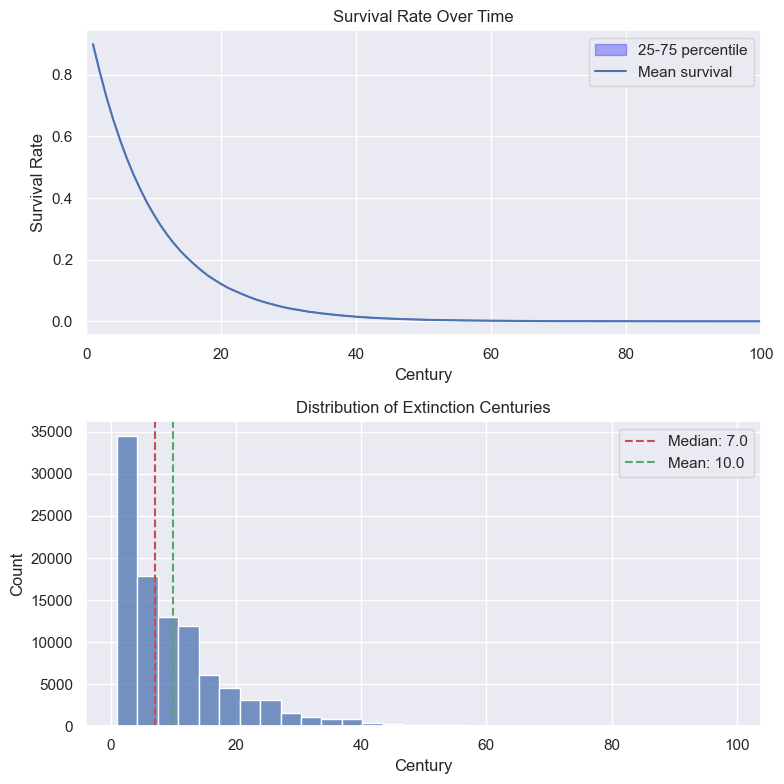

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
ax = experiment.plot_survival_rate(ax=axes[0])
latest_extinction = stats['latest_extinction'].max()
ax.set_xlim([0, latest_extinction + 1])

ax_hist = experiment.plot_extinction_century_histogram(ax=axes[1])